<a href="https://colab.research.google.com/github/drm1072/Data_Sets/blob/main/Supervised_Learning_Regression_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  #Numpy provides fast mathematical function processing
import matplotlib.pyplot as plt #Machine learning library to create plots and data visualizations
import pandas as pd #Used for high level Data Indexing processes
from sklearn.model_selection import train_test_split #Has replaced "import sklearn.cross validation as cross_validation"
from sklearn.linear_model import LinearRegression #Machine Learning library used to display
from sklearn.svm import LinearSVC #Used this to fit to the data you provide, returning a "best fit" for regression/classification

In [2]:
#This is the raw github data to import csv files
#drmdatasample is the dataframe
drmdatasample = pd.read_csv('https://raw.githubusercontent.com/TERRENCE2019/DATASETS/master/student_scores.csv')

In [3]:
drmdatasample

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#Shows us the entire dataset in rows and columns
drmdatasample.shape

(25, 2)

In [5]:
#This is the dataframe
#Now we want to preview our data using the code below
#The number of rows and columns are displayed at the bottom
drmdatasample.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
#This gives us some insight into our data
#Count tells us that every row is equal in both columns
#Mean tells us the average of the values in each column
#Standard Deviation is the disparity between each number and the mean
#A low standard deviation means that most of the numbers are close to the average (mean)
#A high standard deviation means that the numbers are more spread out
drmdatasample.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


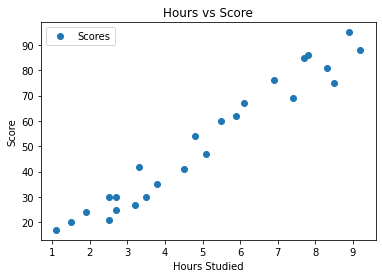

In [7]:
#Lets create a simple scatter plot to see if a linear relationship exist before we do Machine learning
#This helps us physically see the standard deviation from the overall linear slope or trend
drmdatasample.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Score')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

In [8]:
#Now we can divide the data into "Attributes" and "Labels"
#Attributes are the independent variables (x axis)
#Labels are the dependent variables whose values are to be predicted (y axis)
#Now we want to predict the precentage score depending upon the hours studied
#iloc gets rows (or columns) at particular positions in the index
#row selector and column selector
#Even though we only have 2 columns this comes in handy with data that has multiple columns
x = drmdatasample.iloc[:,0:-1].values #":" is the iloc code for all the rows
y = drmdatasample.iloc[:, 1].values #We want all the rows ":" and just the second column as our (y axis = dependent variable = scores)

In [9]:
#split the dataset into the training set and test the set
#We're splitting the data for training and testing
#75% of it will be for training and 25% of it will be tested for accuracy 70/30
#xtrain: this will be your training group
#xtest: this will be your test group
#ytrain: this will be your target for your training group
#ytest: target for your test group
#random_state of 0 gives you same value each time you change it, You will get different values 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.75, test_size = 0.25, random_state = 0, shuffle = True)

In [10]:
#These codes train our algorithm for Linear Regression and machine learning
reg = LinearRegression()
reg.fit(xtrain, ytrain)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#We want to see the intercept
print(reg.intercept_)

1.9322042531516601


In [12]:
#That one more hour of study can increase chances of a higher score by 9.94%
print(reg.coef_)

[9.94167834]


In [13]:
#we will use our test data to see how accurately our algorithm predicts the percentage score
#To make predictions on the test data
yprediction = reg.predict(xtest)

In [14]:
#This shows us the actual value of the test scores compared to the predicted values
#Not to bad but could use some tightening up
drmdatasample2 = pd.DataFrame({'Actual': ytest, 'Predicted': yprediction})

In [15]:
drmdatasample2

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [16]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
#The root mean squared error is 4.5, which is less than 10% of the mean value of the percentages of all the students (51.48)
#This means that our algorithm did an okay job
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, yprediction)) #the absolute value of the squared errors
print('Mean Squared Error:', metrics.mean_squared_error(ytest, yprediction)) #mean squared error(mse)is the mean of the squared errors
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, yprediction)))#Square root of the mean of the squared errors

Mean Absolute Error: 4.130879918502482
Mean Squared Error: 20.33292367497996
Root Mean Squared Error: 4.509204328368805


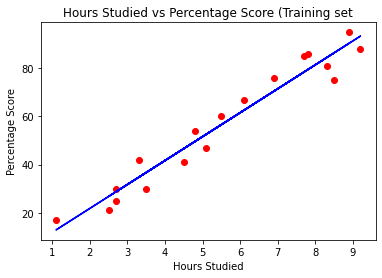

In [17]:
plt.scatter(xtrain, ytrain, color = 'red')
plt.plot(xtrain, reg.predict(xtrain), color = 'blue')
plt.title('Hours Studied vs Percentage Score (Training set')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()